In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
cancer = pd.read_csv('breast-cancer.csv')
cancer

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


In [7]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [9]:
cancer.columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
for col in ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class' ]:
       le = LabelEncoder()
       cancer[col] = le.fit_transform(cancer[col])

In [11]:
cancer

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,2,2,2,0,1,2,1,2,0,1
1,3,0,2,0,0,0,1,0,0,0
2,3,0,6,0,0,1,0,1,0,1
3,2,2,6,0,1,2,1,1,1,0
4,2,2,5,4,1,1,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...
281,3,0,5,5,1,1,0,1,0,0
282,3,2,4,4,1,1,0,1,1,0
283,1,2,5,5,1,1,1,4,0,0
284,3,2,2,0,0,1,1,1,0,0


# Separate Data Target

In [12]:
x = cancer.drop('Class', axis=1)
y = cancer['Class']

In [18]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
predicted = knnModel.predict(x_test)
predicted

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1])

In [16]:
from sklearn import metrics
print("K-Nearest Neighbors model accuracy(in %):", metrics.accuracy_score(y_test, predicted) * 100)

K-Nearest Neighbors model accuracy(in %): 72.22222222222221


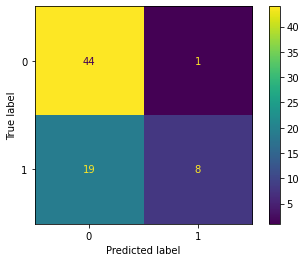

In [17]:
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knnModel.classes_)
disp.plot()
plt.show()